In [1]:
import os, sys
sys.path.append('/'.join(os.getcwd().split('/')[:-1]))
from interactive_utils import *
from utils.utils import write_FASTA
from Bridgeport.Bridgeport import Bridgeport
import py3Dmol
from datetime import datetime
from rdkit.Chem.Draw import rdDepictor

/home/dcooper/anaconda3/envs/prep/lib/python3.12/site-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


**Let's start with some basic information...**

**Protein Input**

- *input_pdb_dir*: (str) path to directory where the *input_pdb* can be found. 
- *input_pdb*: (str) name of input structure
- *chain*: (str) of chain to use from *input_pdb* to align

**Ligand Input** (if you are doing an analogue, fill in this information for the templace ligand in your experimental structure)

- *name*: (str) a name for your ligand
- *resname*: (str) resname of ligand found in *input_pdb*. If the ligand, is a peptide set to "False".
- *chainid*: (str) if ligand is a peptide, specify the letter code that denotes the ligand, if not set to "False".
- *smiles*: (str) smiles string for you ligand. 

In [2]:
# Set you working directory
input_dir = '/home/dcooper/projects/D2'

In [3]:
# Protein input
input_pdb_dir = os.path.join(input_dir, 'crystal_pdb') # Change as needed
input_pdb = '6cm4.pdb' # Change as needed
chain = 'A' # Change as needed


# Ligand input
name = '6cm4'
resname = '8NU'
chainid = False
lig_smiles = "CC1=C(C(=O)N2CCCCC2=N1)CCN3CCC(CC3)C4=NOC5=C4C=CC(=C5)F"


In [4]:
# Build initial .json file and BP object
working_dir = os.getcwd()
json_dict = {'working_dir': working_dir}

# Update params
json_dict['Protein'] = {'input_pdb_dir': input_pdb_dir,
                        'input_pdb': input_pdb,
                        'chain': chain}


json_dict['Ligand'] = {'name': name,
                       'resname': resname,
                       'chainid': chainid,
                       'smiles': lig_smiles}

json_fn = 'interactive.json'
write_json(json_dict, json_fn)
start = datetime.now()
BP = Bridgeport(json_fn, verbose=False)

11/12/2024 01:09:56//Welcome to Bridgeport.
11/12/2024 01:09:56//Found input parameters.
11/12/2024 01:09:56//working_dir:
11/12/2024 01:09:56//working_dir: /home/dcooper/git/Bridgeport/interactive
11/12/2024 01:09:56//Protein:
11/12/2024 01:09:56//	input_pdb_dir: /home/dcooper/projects/D2/crystal_pdb
11/12/2024 01:09:56//	input_pdb: 6cm4.pdb
11/12/2024 01:09:56//	chain: A
11/12/2024 01:09:56//Ligand:
11/12/2024 01:09:56//	name: 6cm4
11/12/2024 01:09:56//	resname: 8NU
11/12/2024 01:09:56//	chainid: False
11/12/2024 01:09:56//	smiles: CC1=C(C(=O)N2CCCCC2=N1)CCN3CCC(CC3)C4=NOC5=C4C=CC(=C5)F


1. **Align your protein to a reference structure**
- *reference_pdb*: (str) path to refence structure to align input structure to
- *reference_chain*: (List[str]) of chains of the *reference_pdb* to use in the alignment process

In [5]:
# Set input paths
reference_pdb = os.path.join(input_dir, 'OPM', '6cm4.pdb') # Change as needed
reference_chain = ['A'] # Change as needed

# Update input params
BP.input_params['Environment'] = {'alignment_ref': reference_pdb,
                                  'reference_chain': reference_chain}

# Align
BP.align_to_reference()

# Visualizes aligned structures
view = py3Dmol.view()
view.setBackgroundColor('white')
view.addModel(open(BP.aligned_pdb, 'r').read(),'pdb')
view.addModel(open(reference_pdb, 'r').read(),'pdb')
view.setStyle({'model':0}, {'cartoon': {'color':'blue'}})
view.setStyle({'model':1}, {'cartoon': {'color':'yellow'}})
view.zoomTo()
view.show()


11/12/2024 01:09:56//Found directory for aligned input structures: /home/dcooper/git/Bridgeport/interactive/aligned_input_pdb
11/12/2024 01:09:56//Found references structure /home/dcooper/projects/D2/OPM/6cm4.pdb and will align to chains ['A']
11/12/2024 01:09:56//Found input structure: /home/dcooper/projects/D2/crystal_pdb/6cm4.pdb
11/12/2024 01:09:56//Saved aligned structure to: /home/dcooper/git/Bridgeport/interactive/aligned_input_pdb/6cm4.pdb


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

**OPTIONAL** **Build an analogue from a template ligand**

0.1 **Get maximum common substructure**

- *name*: (str) a name for your ligand
- *smiles*: (str) smiles str of your analogue.
- *add_atoms*: (List[List[int]]) List of atom inds as depicted to be added to common substructure. Ex: [[0, 1], [2, 4]] where atoms 0 and 2 in the analogue match atoms 1 and 4 in the template, respectively. Default is False, which will use automatically determined maximum common substructure.
- *remove_atoms*: (List[int[) List of atoms inds to remove from the analogue. The corresponding atoms from the template structure will be removed automatically. Default is False, which will use automatically determined maximum common substructure.

11/12/2024 01:09:56//Found directory for ligand structures: /home/dcooper/git/Bridgeport/interactive/ligands
11/12/2024 01:09:56//Must set either resname or chainid
11/12/2024 01:09:56//Saved prepared ligand to /home/dcooper/git/Bridgeport/interactive/ligands/6cm4.pdb /home/dcooper/git/Bridgeport/interactive/ligands/6cm4.sdf
11/12/2024 01:09:56//Must set either resname or chainid
11/12/2024 01:09:56//Created analogue ziprasidone from smiles: C1CN(CCN1CCC2=C(C=C3C(=C2)CC(=O)N3)Cl)C4=NSC5=CC=CC=C54
11/12/2024 01:09:56//Created known ligand 6cm4 from smiles: CC1=C(C(=O)N2CCCCC2=N1)CCN3CCC(CC3)C4=NOC5=C4C=CC(=C5)F
Analogue, Template


[01:09:56] WARNING: More than one matching pattern found - picking one



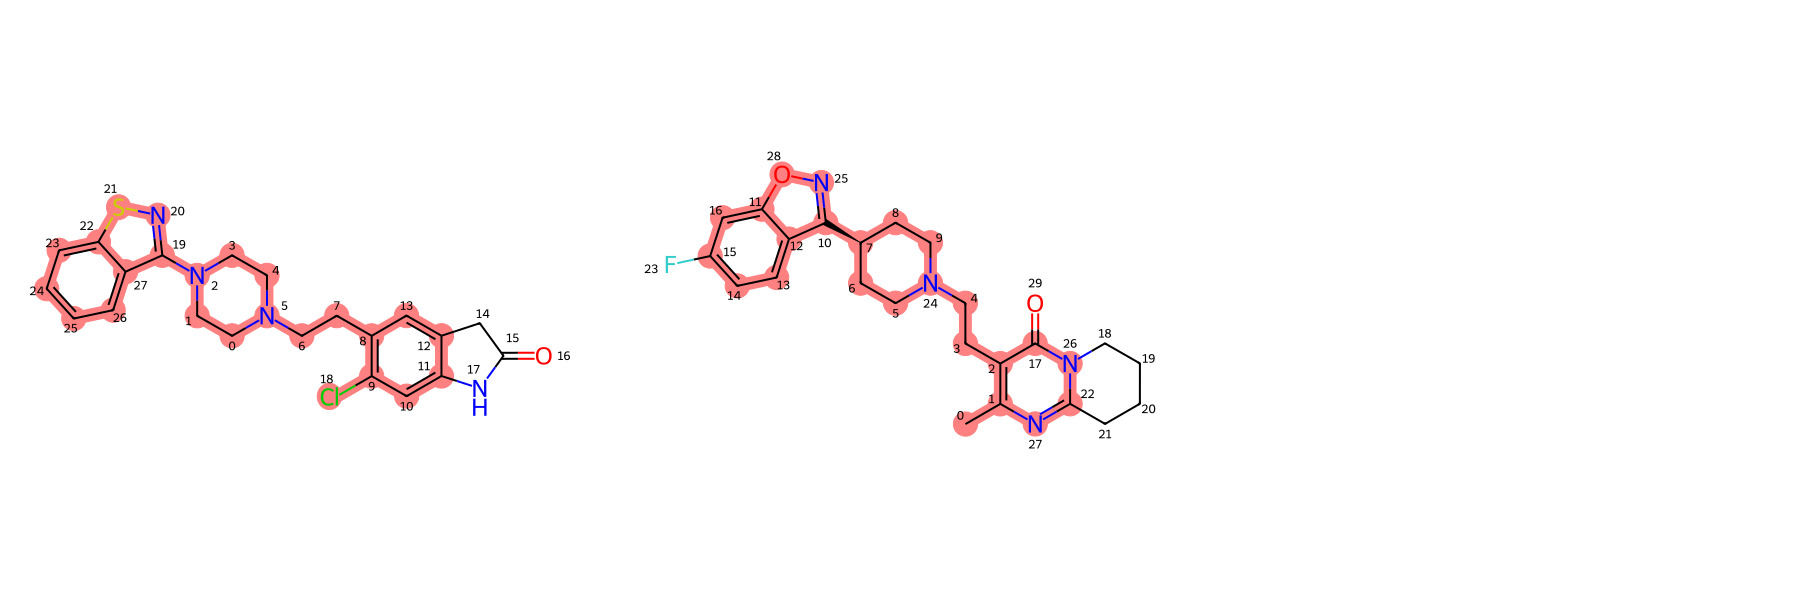

In [6]:
# # # Analogue input
name = 'ziprasidone' # Change as needed
smiles = 'C1CN(CCN1CCC2=C(C=C3C(=C2)CC(=O)N3)Cl)C4=NSC5=CC=CC=C54' # Change as needed
add_atoms = [[5,24], [0,5], [1,6], [2,7], [3,8], [4,9], [6,4], [7,3], [8,2], [9,1], [18,0], [10,27], [11,22], [12,26], [13,17], [19,10], [21,28], [20,25], [22,11], [23,16], [24,15], [25,14], [26,13], [27,12]]
remove_atoms = [id for id in range(8,14)] # Change as needed
# Update params
BP.input_params['Ligand']['Analogue'] = {'name': name, 'smiles': smiles, 'add_atoms': add_atoms, 'remove_atoms': remove_atoms}
BP.get_analogue_MCS()

**OPTIONAL** **Build an analogue from a template ligand**

0.2 **Align analogue to template**

- *align_all*: (bool) If True, will use atoms in *add_atoms* for alignment. Default is False which will only use the automatically detected maximum common substructure.
- *rmsd_tresh*: (float) RMSD threshold that analogue conformation must reach during alignment to be accepted as a permittable structure. Default is 3.0 Angstrom.

In [7]:
# Inputs
align_all = True # Change as needed
rmsd_thresh = 3.0 # Change as needed
n_conformers = 1

# Update params
BP.input_params['Ligand']['Analogue']['align_all'] = align_all
BP.input_params['Ligand']['Analogue']['rmsd_thresh'] = rmsd_thresh
BP.input_params['Ligand']['Analogue']['n_conformers'] = n_conformers


BP.build_analogue_complex() #TODO: 
BP.analogue.visualize_alignment()

['N2' 'C1' 'C2' 'N1' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'CL1' 'C9' 'C10' 'C11'
 'C12' 'C15' 'S1' 'N4' 'C16' 'C17' 'C18' 'C19' 'C20' 'C21']
11/12/2024 01:09:56//Saved conformer to /home/dcooper/git/Bridgeport/interactive/ligands/ziprasidone_conformers/ziprasidone_0.pdb
11/12/2024 01:09:56//Saved first conformer to /home/dcooper/git/Bridgeport/interactive/ligands/ziprasidone.pdb


[01:09:56] Molecule does not have explicit Hs. Consider calling AddHs()
[01:09:56] Molecule does not have explicit Hs. Consider calling AddHs()
[01:09:56] Molecule does not have explicit Hs. Consider calling AddHs()
[01:09:56] Molecule does not have explicit Hs. Consider calling AddHs()


11/12/2024 01:09:56//Built new inital complex.
11/12/2024 01:09:56//Changing ligand resname to: UNL
BLUE: ziprasidone
YELLOW: 6cm4


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

2. **Seperate your ligand and protein for individual preparations**

In [8]:
# Separate
BP.separate_lig_prot()

11/12/2024 01:09:56//Found directory for protein structures: /home/dcooper/git/Bridgeport/interactive/proteins
11/12/2024 01:09:56//Found directory for ligand structures: /home/dcooper/git/Bridgeport/interactive/ligands
11/12/2024 01:09:56//Separated chain(s) A from input structure
11/12/2024 01:09:56//Separated ligand UNL from input structure with 28 atoms


3. **Repair the protein**
   - *tails*: List of indices to parse the extra tails. EX: [30, 479]
   - *loops*: 2-D List of indices that specify lower and upper bounds of loops to optimize during refinement. Loop optimization can take a while, but if skipped, unbonded output structures will result.
   - *secondary_template*: Path to secondary .pdb to use as a reference to accurately model large portions that are missing in the input .pdb structure.
   - *engineered_resids*: List of resids that are known engineered mutations in the crystal pdb. Adding this argument may prevent sequence errors in the RepairProtein section of Bridgeport.
   - *receptor_gene*: (str) gene of the receptor
   - *sequence*: (str) sequence of the receptor you are trying to model

In [9]:
# Set input
tails = [35, 442] # Change as needed
loops = False # Change as needed
secondary_template = os.path.join(input_dir, 'crystal_pdb', 'AFD2DR.pdb') # Change as needed
engineered_resids = [resid for resid in range(1002, 1162)] # Change as needed
receptor_gene = 'D2DR' # Change as needed
sequence = """
MDPLNLSWYDDDLERQNWSRPFNGSDGKADRPHYNYYATLLTLLIAVIVFGNVLVCMAVSREKALQTTTNYLIVSLAVADLLVATLVMPWVVYLEVVGEWKFSRIHCDIFVTLDVMMCTASILNLCAISIDRYTAVAMPMLYNTRYSSKRRVTVMISIVWVLSFTISCPLLFGLNNADQNECIIANPAFVVYSSIVSFYVPFIVTLLVYIKIYIVLRRRRKRVNTKRSSRAFRAHLRAPLKGNCTHPEDMKLCTVIMKSNGSFPVNRRRVEAARRAQELEMEMLSSTSPPERTRYSPIPPSHHQLTLPDPSHHGLHSTPDSPAKPEKNGHAKDHPKIAKIFEIQTMPNGKTRTSLKTMSRRKLSQQKEKKATQMLAIVLGVFIICWLPFFITHILNIHCDCNIPPVLYSAFTWLGYVNSAVNPIIYTTFNIEFRKAFLKILHC
""" # Change as needed

# Write FASTA
fasta_path = os.path.join(input_dir, 'fasta', f'{receptor_gene}.fasta')
write_FASTA(sequence, receptor_gene, fasta_path)

# Update params
BP.input_params['RepairProtein'] = {'fasta_path': fasta_path,
                                    'working_dir': os.path.join(os.getcwd(), 'modeller_intermediates'),
                                    'tails': tails, 
                                    'loops': loops,
                                    'secondary_template': secondary_template,
                                    'engineered_resids': engineered_resids}
# Repair
BP.repair_protein()

# Visualizes repaired protein
view = py3Dmol.view()
view.setBackgroundColor('white')
view.addModel(open(os.path.join(BP.prot_only_dir, name + '.pdb'), 'r').read(),'pdb')
view.setStyle({'model':0}, {'cartoon': {'color':'blue'}})
view.zoomTo()
view.show()

11/12/2024 01:09:56//Welcome to RepairProtein
11/12/2024 01:09:56//Protein to repair: /home/dcooper/git/Bridgeport/interactive/proteins/ziprasidone.pdb
11/12/2024 01:09:56//Template sequence: /home/dcooper/projects/D2/fasta/D2DR.fasta
11/12/2024 01:09:56//Modeller intermediates will be written to: /home/dcooper/git/Bridgeport/interactive/modeller_intermediates
11/12/2024 01:09:56//Removed mutated residues with resids: [184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 29

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

4. **Build the environment**

- "membrane": If membrane should be specified choose "true", and make sure that "alignment_ref" argument is the appropriate OPM structure. Default is false.
- "pH": Specify the pH. Default is 7.0.
- "ion_strength": Specify the concentration of NaCl ions (in Molar). Default is 0.15 M.


In [10]:
# Set input
membrane = True # Change as needed
pH = 7.2 # Change as needed
ion_strength = 0.15 # Change as needed

BP.input_params['Environment']['membrane'] = membrane
BP.input_params['Environment']['pH'] = pH
BP.input_params['Environment']['ion_strength'] = ion_strength

# BP.add_environment()

5. **Prepare the ligand**
- *small_molecule_params (bool)*: If true, treat ligand like a small molecule. Default is True.
- *sanitize (bool)*: If true, sanitize molecule with rdkit. Default is True. Only applicable if small_molecule_params is True. 
- *removeHs (bool)*: If true, remove any hydrogens that may be present. Default is True. Only applicable if small_molecule_params is True.
- *proximityBonding* (bool): If true, use rdkit's 'proximityBonding' method to load rdkit molecule. 
- *pH (float)*: pH to protonate a peptide ligand. Default is 7.0.
- *nstd_resids (List[int])*: List of nonstandard resids to conserve from input structure. 
- *neutral_Cterm (bool)*: If true, neutralize the C-terminus of a peptide ligand. Only applicable is small_molecule_params is False


11/12/2024 01:10:52//Must set either resname or chainid


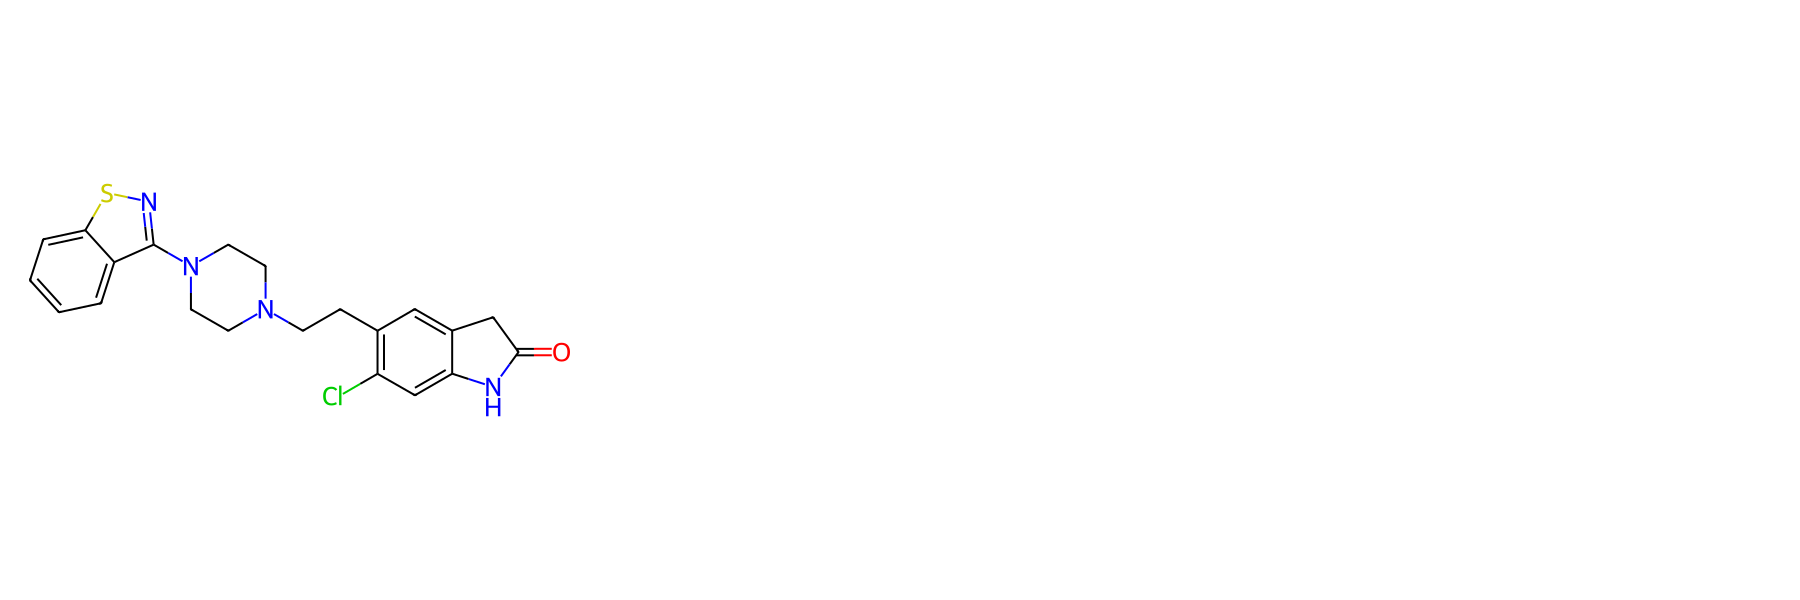

11/12/2024 01:10:52//Saved prepared ligand to /home/dcooper/git/Bridgeport/interactive/ligands/ziprasidone.pdb /home/dcooper/git/Bridgeport/interactive/ligands/ziprasidone.sdf
11/12/2024 01:10:52//Must set either resname or chainid
11/12/2024 01:10:52//Saved prepared ligand to /home/dcooper/git/Bridgeport/interactive/ligands/ziprasidone_conformers/ziprasidone_0.pdb /home/dcooper/git/Bridgeport/interactive/ligands/ziprasidone_conformers/ziprasidone_0.sdf


[01:10:52] WARNING: More than one matching pattern found - picking one

[01:10:52] WARNING: More than one matching pattern found - picking one



3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [11]:
# Ligand Input
small_molecule_params = True # Change as needed
sanitize = True # Change as needed
removeHs = True # Change as needed
proximityBonding = False # Change as needed
nstd_resids = None # Change as needed
pH = 7.0 # Change as needed
neutral_Cterm = False # Change as needed

# Update params
BP.input_params['Ligand']['small_molecule_params'] = small_molecule_params
BP.input_params['Ligand']['sanitize'] = sanitize
BP.input_params['Ligand']['removeHs'] = removeHs
BP.input_params['Ligand']['proximityBonding'] = proximityBonding
BP.input_params['Ligand']['nstd_resids'] = nstd_resids
BP.input_params['Ligand']['pH'] = pH
BP.input_params['Ligand']['neutral_Cterm'] = neutral_Cterm

# Prepare
BP.ligand_prep()

# Visualizes ligand sdf and pdb
view = py3Dmol.view()
view.setBackgroundColor('white')
if hasattr(BP, 'lig_sdf'):
    view.addModel(open(BP.lig_sdf, 'r').read(),'sdf')
else:
    view.addModel(open(BP.lig_pdb, 'r').read(),'pdb')
view.setStyle({'model':0}, {'stick': {'colorscheme':'cyanCarbon'}})
view.zoomTo()
view.show()


6. **Build the forcefields**


In [12]:
# BP.generate_systems()

**Save you input_parameters to a .json file**
- *json_fn*: str path to .json file where you would like to save your input parameters

In [13]:
# Change ligand smiles back
BP.input_params['Ligand']['smiles'] = lig_smiles

# Set .json location
json_fn = os.path.join(input_dir, 'input_json', 'Bridgeport', f'{name}.json')
write_json(BP.input_params, json_fn)

print('WROTE:', json_fn)
print('TOOK:', datetime.now() - start)

WROTE: /home/dcooper/projects/D2/input_json/Bridgeport/ziprasidone.json
TOOK: 0:02:10.747917
